<IPython.core.display.Javascript object>


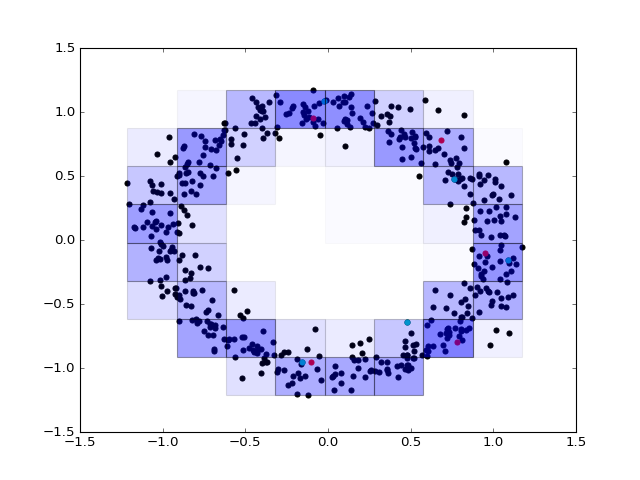

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
from TopologyFunctionality.Startup import Startup
from TopologyFunctionality.Helper import TimeDelayEmbeddingUtil as tde
from TopologyFunctionality.Helper import OctreeUtil as ou
from TopologyFunctionality.Octree import Octree
import numpy as np
import matplotlib.patches as patches

class Image(object):
    
    def __init__(self,fig,ax):
        self.fig = fig
        self.ax = ax
        self.wave = np.array(Startup())
        self.waveStart = 0
        self.waveEnd = tde.getWaveEnd(self.waveStart)
        self.waveLength = self.wave.size
        [self.x,self.y, self.tauX] = tde.getPhaseData(self.wave, self.waveStart, self.waveEnd)
        self.oldX = []
        self.oldY = []
        self.newX = []
        self.newY = []
        self.drawScatter()
        self.fig.canvas.draw()
        self.points = ou.getPointObjects(self.x,self.y)
        self.oct = Octree.Octree(4)
        self.oct.createOctree(self.points,True)
        
    def drawScatter(self):
        self.ax.scatter(self.x,self.y,color='k')
        self.ax.scatter(self.oldX,self.oldY,color='r')
        self.ax.scatter(self.newX,self.newY,color='c')

    def drawPlot(self, event):
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            self.slideWindow(5)
        elif event.key == 'p':
            self.slideWindow(-5)
        plt.cla()
        self.drawScatter()
        self.drawOctree()
        self.fig.canvas.draw()

    def slideWindow(self, distance):
        if self.waveStart+distance<0 or self.waveEnd+distance>self.waveLength or distance==0:
            return
        else:
            self.waveStart = self.waveStart+distance
            if distance>0:
                self.oldX=self.x[:distance]
                self.oldY=self.y[:distance]
                (self.newX,self.newY) = tde.slidePhaseSpace(self.wave,self.waveEnd,distance,self.tauX)
                self.x=np.concatenate((self.x[distance:],self.newX))
                self.y=np.concatenate((self.y[distance:],self.newY))
                newPts = ou.getPointObjects(self.newX,self.newY)
                self.oct.appendPoints(newPts)
            else:
                self.oldX=self.x[distance:]
                self.oldY=self.y[distance:]
                (self.newX,self.newY) = tde.slidePhaseSpace(self.wave,self.waveStart,distance,self.tauX)
                self.x=np.concatenate((self.newX,self.x[:distance]))
                self.y=np.concatenate((self.newY,self.y[:distance]))
                newPts = ou.getPointObjects(self.newX,self.newY)
                self.oct.prependPoints(newPts)
            self.waveEnd = self.waveEnd+distance
            
            
    def drawOctree(self):
        [minX,minY,maxX,maxY,intensity] = self.oct.drawBins(self.oct.firstLevel)
        for i in range(0,len(minX)):
            self.ax.add_patch(patches.Rectangle((minX[i], minY[i]), maxX[i]-minX[i], maxY[i]-minY[i],alpha=intensity[i]))
            
            
    
if __name__ == '__main__':
    fig, ax = plt.subplots()
    image = Image(fig,ax)
    fig.canvas.mpl_connect('key_press_event',image.drawPlot)
    plt.show()